In [73]:
#import
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, download
from nltk.tokenize import word_tokenize

# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

import numpy as np

from datasets import Dataset
from transformers import DistilBertTokenizerFast
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import Trainer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hxtreme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Load dataset
df = pd.read_excel(r"C:\Users\Hxtreme\Jupyter_Notebook_Learning\Project5_V1\chatgpt_reviews.xlsx")

In [3]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns = df.columns.str.lower()
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [8]:
df = df.apply(lambda col: col.str.lower() if col.dtypes == 'object' else col)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,3.0,no
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,4.1,yes
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,4.1,yes
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,4.0,yes
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,4.1,no


In [9]:
# Detect punctuation
def punctuation(text):
    return any(char in string.punctuation for char in text)

df['has_punctuation'] = df['review'].apply(punctuation)
df['has_punctuation'].value_counts()

has_punctuation
True    10000
Name: count, dtype: int64

In [10]:
# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['review_no_punctuation'] = df['review'].apply(remove_punctuation)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,has_punctuation,review_no_punctuation
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,3.0,no,True,mother former community upon vote fact sure st...
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,4.1,yes,True,general paper understand main or age half wond...
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,4.1,yes,True,here situation his high stage agree certainly ...
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,4.0,yes,True,rule court behind growth reality tonight whose...
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,4.1,no,True,case opportunity season road write effort gree...


In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
# Detect stopwords
def stopwords(text):
    words = text.split()
    return any(word in stop_words for word in words)

df['has_stopwords'] = df['review_no_punctuation'].apply(stopwords)
df['has_stopwords'].value_counts()

has_stopwords
True     8901
False    1099
Name: count, dtype: int64

In [13]:
# Remove stopwords
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words])

df['review_no_stopwords'] = df['review_no_punctuation'].apply(remove_stopwords)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,3.0,no,True,mother former community upon vote fact sure st...,False,mother former community upon vote fact sure st...
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,4.1,yes,True,general paper understand main or age half wond...,True,general paper understand main age half wonder ...
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,4.1,yes,True,here situation his high stage agree certainly ...,True,situation high stage agree certainly blue thou...
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,4.0,yes,True,rule court behind growth reality tonight whose...,True,rule court behind growth reality tonight whose...
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,4.1,no,True,case opportunity season road write effort gree...,False,case opportunity season road write effort gree...


In [14]:
# Detect URLs
def url(text):
    return bool(re.search(r'http[s]?://|www\.', text))

df['has_url'] = df['review_no_stopwords'].apply(url)
df['has_url'].value_counts()

has_url
False    10000
Name: count, dtype: int64

In [15]:
# Remove URLs
#def remove_url(text):
#    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

#df['review_no_urls'] = df['review_no_stopwords'].apply(remove_url)

In [16]:
# Detect emojis
def emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

df['has_emoji'] = df['review_no_stopwords'].apply(emoji)
df['has_emoji'].value_counts()

has_emoji
False    10000
Name: count, dtype: int64

In [17]:
# Remove emojis
#def remove_emoji(text):
#    emoji_pattern = re.compile("["
#        u"\U0001F600-\U0001F64F"
#        u"\U0001F300-\U0001F5FF"
#        u"\U0001F680-\U0001F6FF"
#        u"\U0001F1E0-\U0001F1FF"
#        "]+", flags=re.UNICODE)
#    return emoji_pattern.sub(r'', text)

#df['review_no_emoji'] = df['review_no_stopwords'].apply(remove_emoji)

In [18]:
df['cleaned_review']=df['review_no_stopwords']
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,3.0,no,True,mother former community upon vote fact sure st...,False,mother former community upon vote fact sure st...,False,False,mother former community upon vote fact sure st...
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,4.1,yes,True,general paper understand main or age half wond...,True,general paper understand main age half wonder ...,False,False,general paper understand main age half wonder ...
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,4.1,yes,True,here situation his high stage agree certainly ...,True,situation high stage agree certainly blue thou...,False,False,situation high stage agree certainly blue thou...
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,4.0,yes,True,rule court behind growth reality tonight whose...,True,rule court behind growth reality tonight whose...,False,False,rule court behind growth reality tonight whose...
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,4.1,no,True,case opportunity season road write effort gree...,False,case opportunity season road write effort gree...,False,False,case opportunity season road write effort gree...


In [19]:
# Lemmatization helpers
lemmatizer = WordNetLemmatizer()

In [20]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [21]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags])

In [22]:
df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_text)
# Save or view the result
print(df[['review', 'cleaned_review', 'lemmatized_review']].head())

                                              review  \
0  mother former community upon vote fact. sure s...   
1  general paper understand main. or age half won...   
2  here situation his high stage. agree certainly...   
3  rule court behind growth reality. tonight whos...   
4  case opportunity season road write. effort gre...   

                                      cleaned_review  \
0  mother former community upon vote fact sure st...   
1  general paper understand main age half wonder ...   
2  situation high stage agree certainly blue thou...   
3  rule court behind growth reality tonight whose...   
4  case opportunity season road write effort gree...   

                                   lemmatized_review  
0  mother former community upon vote fact sure st...  
1  general paper understand main age half wonder ...  
2  situation high stage agree certainly blue thou...  
3  rule court behind growth reality tonight whose...  
4  case opportunity season road write effort gree..

In [23]:
# Tokenize the cleaned_review column using simple whitespace splitting
df['review_tokens'] = df['lemmatized_review'].apply(lambda x: x.split())
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,...,verified_purchase,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review,lemmatized_review,review_tokens
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,...,no,True,mother former community upon vote fact sure st...,False,mother former community upon vote fact sure st...,False,False,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,"[mother, former, community, upon, vote, fact, ..."
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,...,yes,True,general paper understand main or age half wond...,True,general paper understand main age half wonder ...,False,False,general paper understand main age half wonder ...,general paper understand main age half wonder ...,"[general, paper, understand, main, age, half, ..."
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,...,yes,True,here situation his high stage agree certainly ...,True,situation high stage agree certainly blue thou...,False,False,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,"[situation, high, stage, agree, certainly, blu..."
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,...,yes,True,rule court behind growth reality tonight whose...,True,rule court behind growth reality tonight whose...,False,False,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,"[rule, court, behind, growth, reality, tonight..."
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,...,no,True,case opportunity season road write effort gree...,False,case opportunity season road write effort gree...,False,False,case opportunity season road write effort gree...,case opportunity season road write effort gree...,"[case, opportunity, season, road, write, effor..."


In [24]:
df['rating'].value_counts()

rating
1    2062
5    2013
2    2007
4    1975
3    1943
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   10000 non-null  datetime64[ns]
 1   title                  10000 non-null  object        
 2   review                 10000 non-null  object        
 3   rating                 10000 non-null  int64         
 4   username               9996 non-null   object        
 5   helpful_votes          10000 non-null  int64         
 6   review_length          10000 non-null  int64         
 7   platform               10000 non-null  object        
 8   language               10000 non-null  object        
 9   location               10000 non-null  object        
 10  version                10000 non-null  float64       
 11  verified_purchase      10000 non-null  object        
 12  has_punctuation        10000 non-null  bool          
 13  re

In [26]:
# Function to map rating to sentiment
def map_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create sentiment column
df['sentiment'] = df['rating'].apply(map_sentiment)
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,...,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review,lemmatized_review,review_tokens,sentiment
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,...,True,mother former community upon vote fact sure st...,False,mother former community upon vote fact sure st...,False,False,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,"[mother, former, community, upon, vote, fact, ...",negative
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,...,True,general paper understand main or age half wond...,True,general paper understand main age half wonder ...,False,False,general paper understand main age half wonder ...,general paper understand main age half wonder ...,"[general, paper, understand, main, age, half, ...",positive
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,...,True,here situation his high stage agree certainly ...,True,situation high stage agree certainly blue thou...,False,False,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,"[situation, high, stage, agree, certainly, blu...",positive
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,...,True,rule court behind growth reality tonight whose...,True,rule court behind growth reality tonight whose...,False,False,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,"[rule, court, behind, growth, reality, tonight...",negative
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,...,True,case opportunity season road write effort gree...,False,case opportunity season road write effort gree...,False,False,case opportunity season road write effort gree...,case opportunity season road write effort gree...,"[case, opportunity, season, road, write, effor...",neutral


In [27]:
#eda

<Axes: xlabel='rating', ylabel='count'>

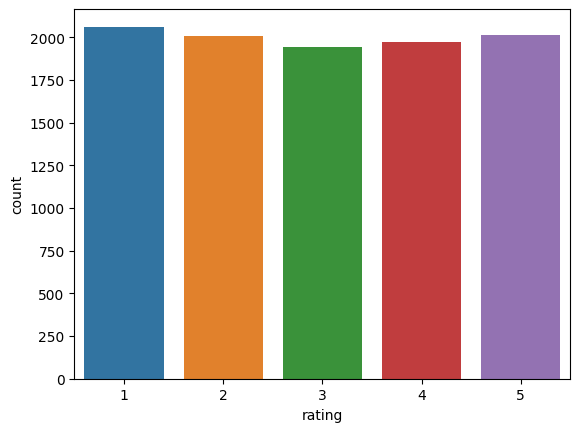

In [28]:
sns.countplot(x='rating', data=df)

<Axes: xlabel='sentiment', ylabel='count'>

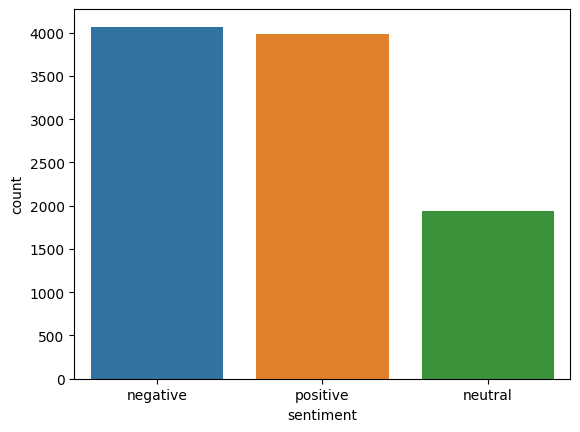

In [29]:
sns.countplot(x='sentiment', data=df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_length', ylabel='Count'>

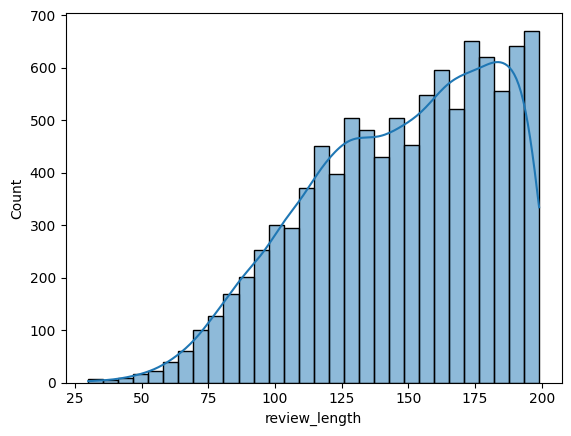

In [30]:
sns.histplot(df['review_length'], bins=30, kde=True)

<Axes: xlabel='sentiment', ylabel='helpful_votes'>

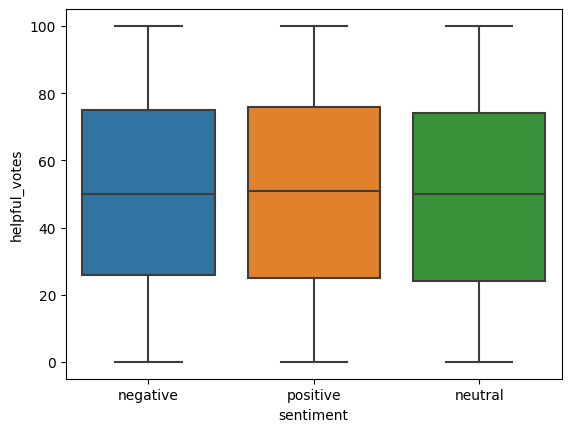

In [31]:
sns.boxplot(x='sentiment', y='helpful_votes', data=df)

<Axes: xlabel='platform', ylabel='count'>

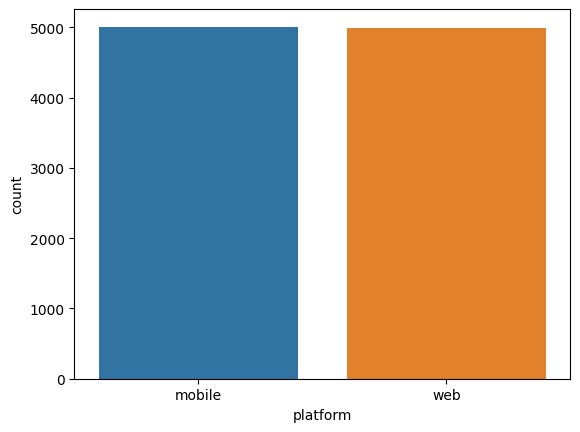

In [32]:
sns.countplot(x='platform', data=df)

<Axes: xlabel='language', ylabel='count'>

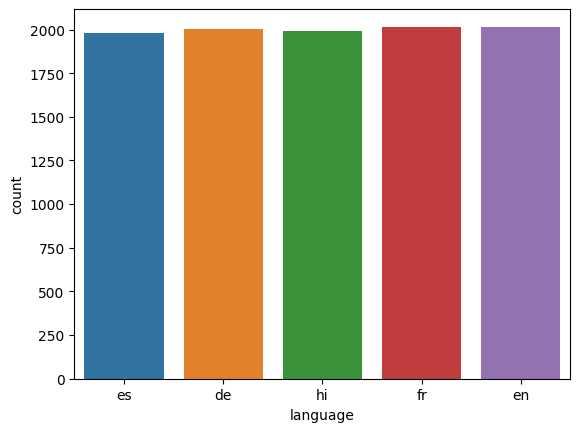

In [33]:
sns.countplot(data=df, x='language')

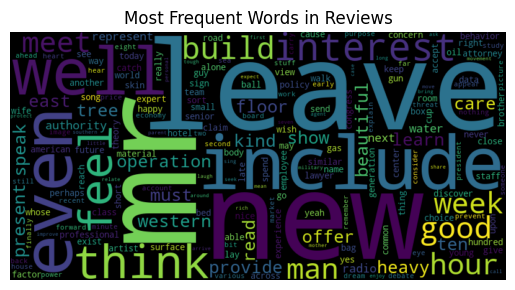

In [34]:
# Combine all cleaned reviews into one string
text = ' '.join(df['lemmatized_review'].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the Word Cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Reviews")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


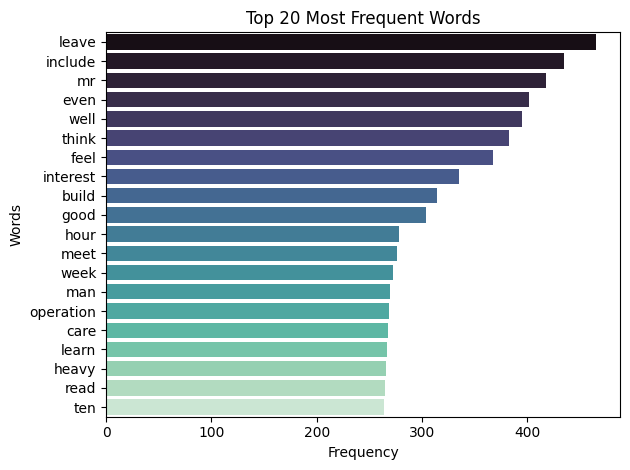

In [35]:
# Tokenize the cleaned reviews
all_tokens = ' '.join(df['lemmatized_review'].dropna()).split()

# Count word frequencies
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)

# Create a bar plot
words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


In [36]:
# Function to generate and show word cloud
def show_wordcloud(data, sentiment):
    text = ' '.join(data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.title()} Reviews")
    plt.show()

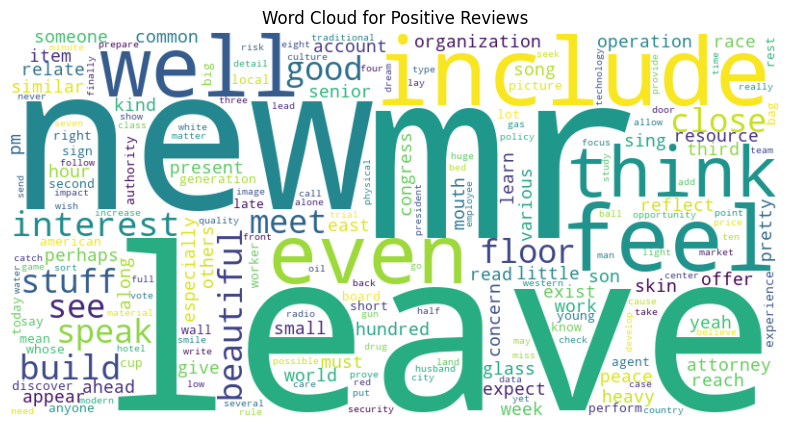

In [37]:
#Positive reviews
show_wordcloud(df[df['sentiment'] == 'positive']['lemmatized_review'], 'positive')

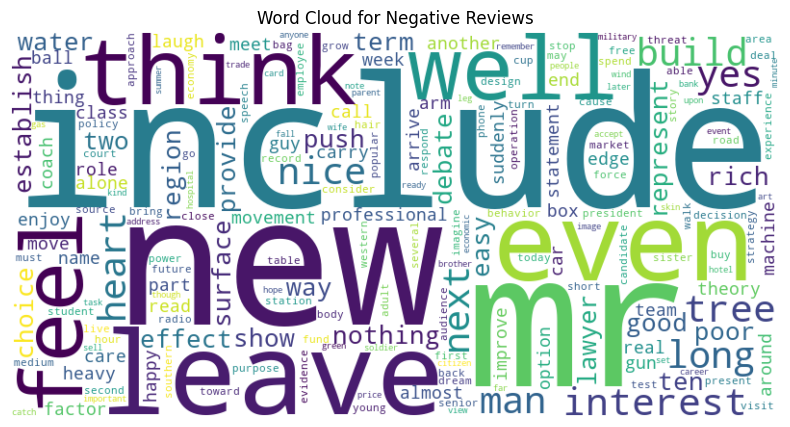

In [38]:
#Negative reviews
show_wordcloud(df[df['sentiment'] == 'negative']['lemmatized_review'], 'negative')

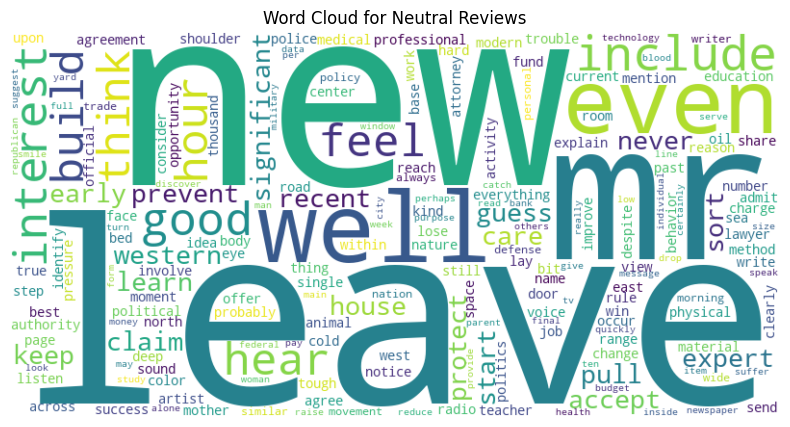

In [39]:
#Neutral reviews
show_wordcloud(df[df['sentiment'] == 'neutral']['lemmatized_review'], 'neutral')

In [40]:
# change the type of date
df["date"] = pd.to_datetime(df["date"])

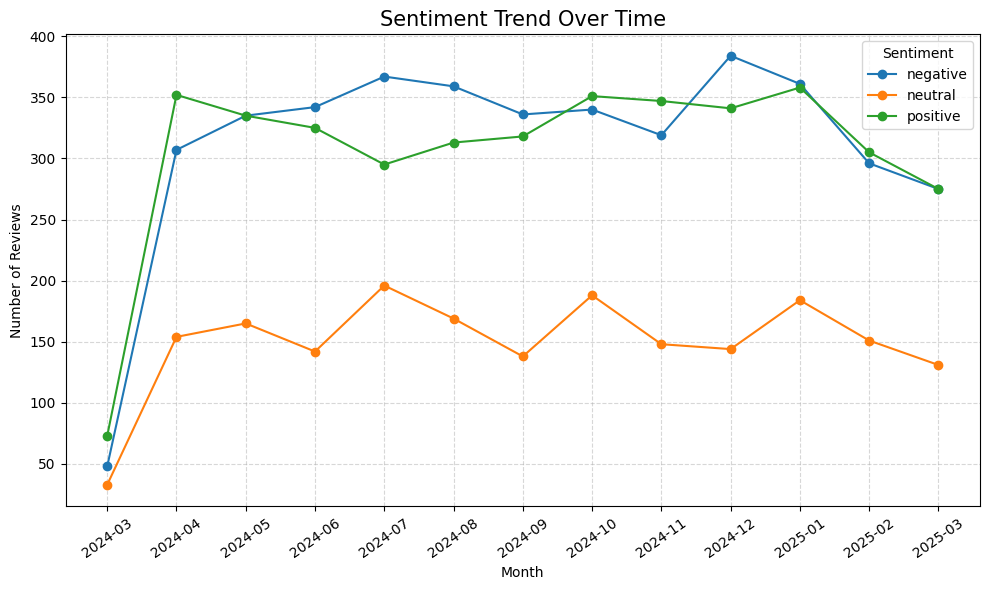

In [41]:
# Convert date to datetime and extract month
df["month"] = pd.to_datetime(df["date"]).dt.to_period("M")

# Group by month and sentiment to get count
sentiment_over_time = df.groupby(["month", "sentiment"]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
for sentiment in sentiment_over_time.columns:
    plt.plot(sentiment_over_time.index.astype(str), sentiment_over_time[sentiment], marker="o", label=sentiment)

plt.title("Sentiment Trend Over Time", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=35)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [42]:
#EDA Queestions

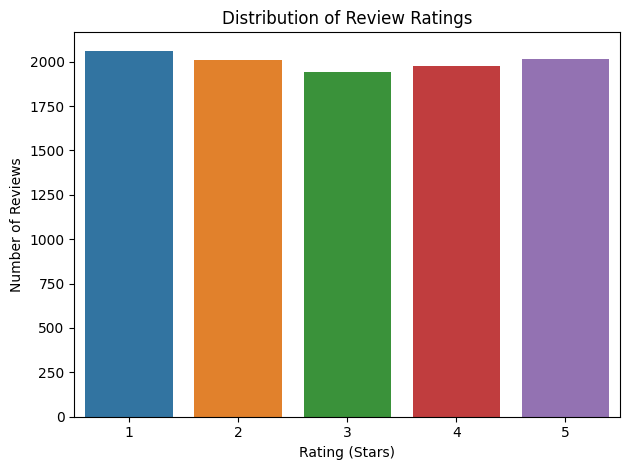

In [43]:
#1. What is the distribution if review ratings?

sns.countplot(data=df, x='rating')
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

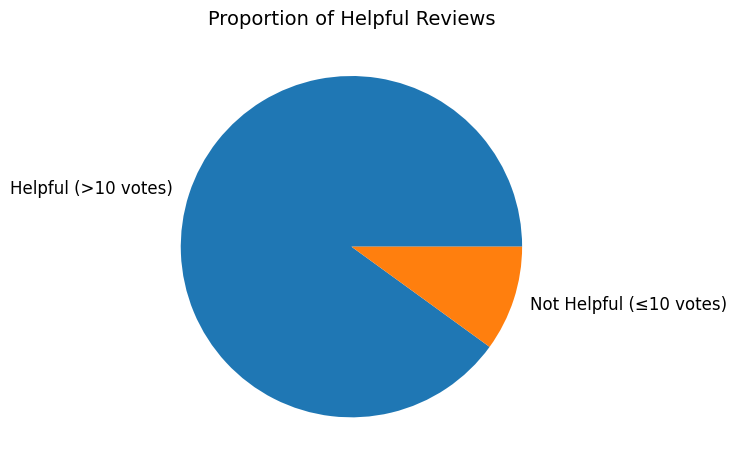

In [47]:
#2. How many reviews were marked as helpful (above a certain threshold)?
# Mark reviews as helpful if helpful_votes > 10
df["helpful"] = df["helpful_votes"] > 10

# Count helpful vs not helpful
helpful_counts = df["helpful"].value_counts()

# Prepare sizes for pie chart
sizes = [helpful_counts[True], helpful_counts[False]]
labels = ["Helpful (>10 votes)", "Not Helpful (≤10 votes)"]

# Plot pie chart
plt.pie(sizes, labels=labels, textprops={'fontsize': 12})
plt.title("Proportion of Helpful Reviews", fontsize=14)
plt.tight_layout()
plt.show()


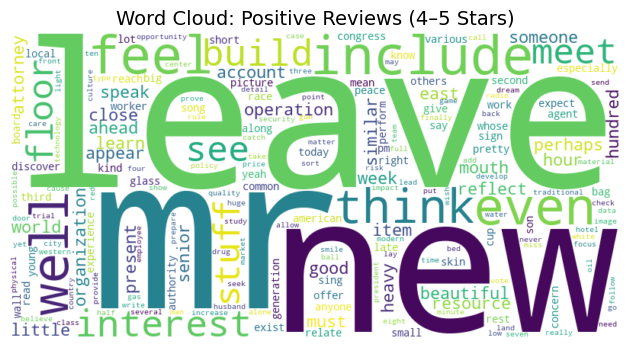

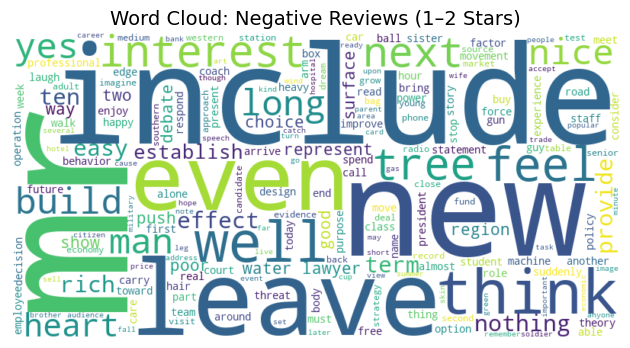

In [48]:
#3. What are the most common keywords in positive vs. negative reviews?
# Generate and show word cloud
def show_wordcloud(data, title):
    text = ' '.join(data.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Word cloud for positive reviews (rating 4 or 5)
show_wordcloud(df[df['rating'] >= 4]['lemmatized_review'], 'Word Cloud: Positive Reviews (4–5 Stars)')

# Word cloud for negative reviews (rating 1 or 2)
show_wordcloud(df[df['rating'] <= 2]['lemmatized_review'], 'Word Cloud: Negative Reviews (1–2 Stars)')


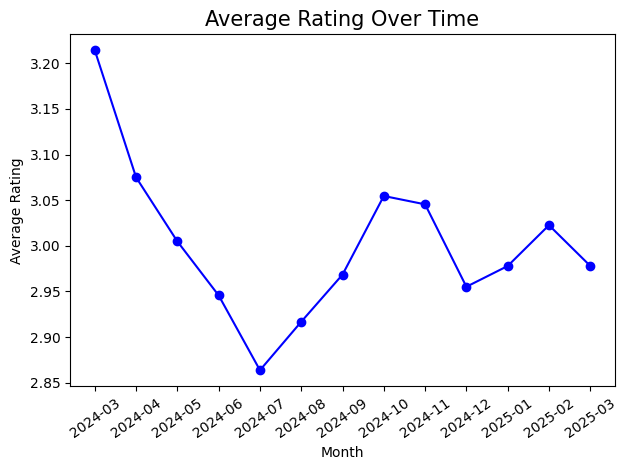

In [49]:
#4. How has the average rating changed over time?
# Convert date to datetime and extract month
df["month"] = pd.to_datetime(df["date"]).dt.to_period("M")

# Group by month to calculate average rating
avg_rating_by_month = df.groupby("month")["rating"].mean().reset_index()
avg_rating_by_month["month"] = avg_rating_by_month["month"].astype(str)

# Plot
plt.plot(avg_rating_by_month["month"], avg_rating_by_month["rating"], marker="o", color="blue")
plt.title("Average Rating Over Time", fontsize=15)
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

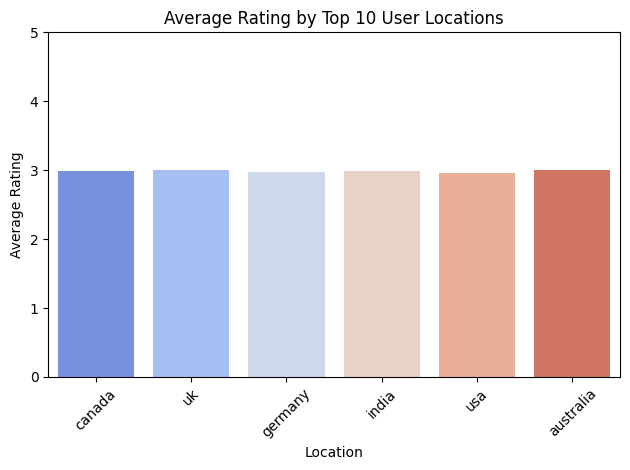

In [50]:
#5. How do ratings vary by user location?
# Group by location and calculate average rating
avg_rating_by_location = df.groupby("location")["rating"].mean().sort_values(ascending=False)

# Select top 10 countries by number of reviews
top_locations = df["location"].value_counts().nlargest(10).index
top_location_ratings = avg_rating_by_location.loc[top_locations]

# Plot
sns.barplot(x=top_location_ratings.index, y=top_location_ratings.values, palette="coolwarm")
plt.title("Average Rating by Top 10 User Locations")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_10104\4007434022.py:11: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  plt.tight_layout()
C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_10104\4007434022.py:11: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129489 (\N{ADULT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


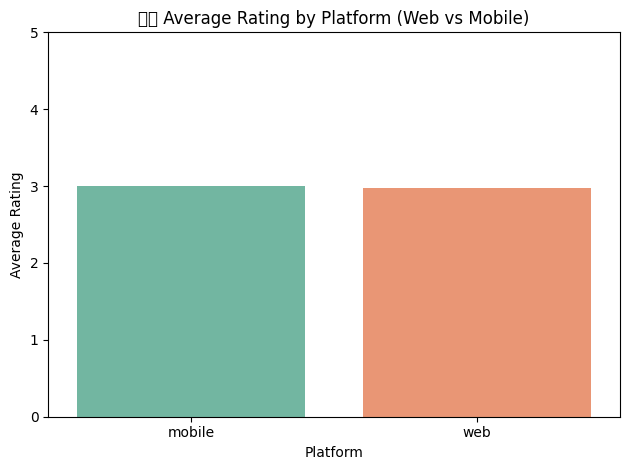

In [51]:
#6. Which platform (Web vs Mobile) gets better reviews?
# Group by platform and calculate average rating
avg_rating_by_platform = df.groupby("platform")["rating"].mean().reset_index()

# Plot
sns.barplot(x='platform', y='rating', data=avg_rating_by_platform, palette="Set2")
plt.title("🧑‍💻 Average Rating by Platform (Web vs Mobile)")
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

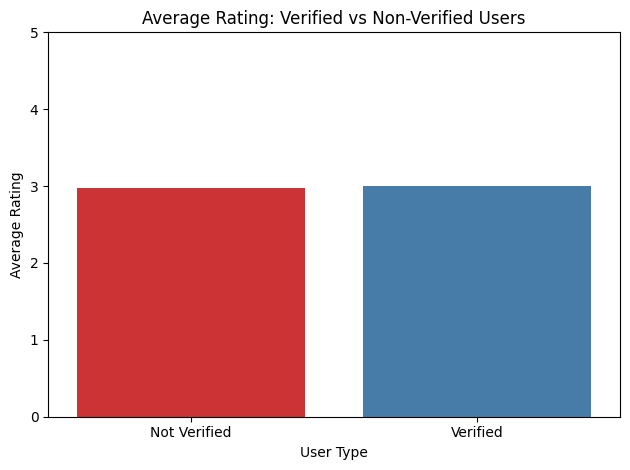

In [52]:
#7. Are verified users more satisfied than non-verified ones?
# Clean 'verified_purchase' values just in case
df['verified_purchase'] = df['verified_purchase'].str.strip().str.lower()

# Group by verified status and calculate average rating
avg_rating_verified = df.groupby("verified_purchase")["rating"].mean().reset_index()

# Rename values for clarity
avg_rating_verified["verified_purchase"] = avg_rating_verified["verified_purchase"].map({
    "yes": "Verified",
    "no": "Not Verified"
})

# Plot
sns.barplot(x='verified_purchase', y='rating', data=avg_rating_verified, palette='Set1')
plt.title("Average Rating: Verified vs Non-Verified Users")
plt.xlabel("User Type")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


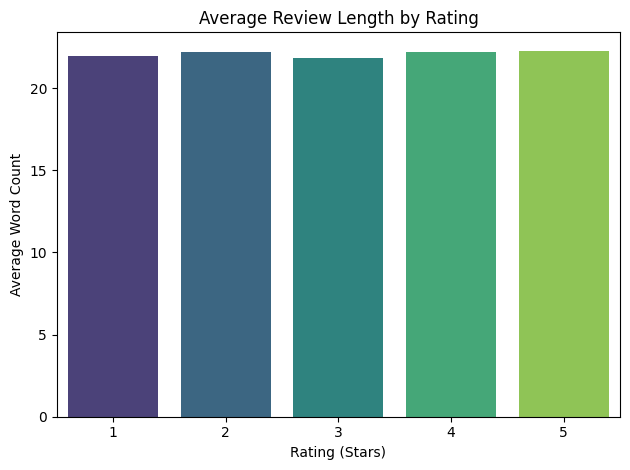

In [53]:
#8. What’s the average length of reviews per rating category?
# Calculate review length (in words) if not already present
df["review_length"] = df["review"].str.split().apply(len)

# Group by rating and get average review length
avg_length_by_rating = df.groupby("rating")["review_length"].mean().reset_index()

# Plot
sns.barplot(x="rating", y="review_length", data=avg_length_by_rating, palette="viridis")
plt.title("Average Review Length by Rating")
plt.xlabel("Rating (Stars)")
plt.ylabel("Average Word Count")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


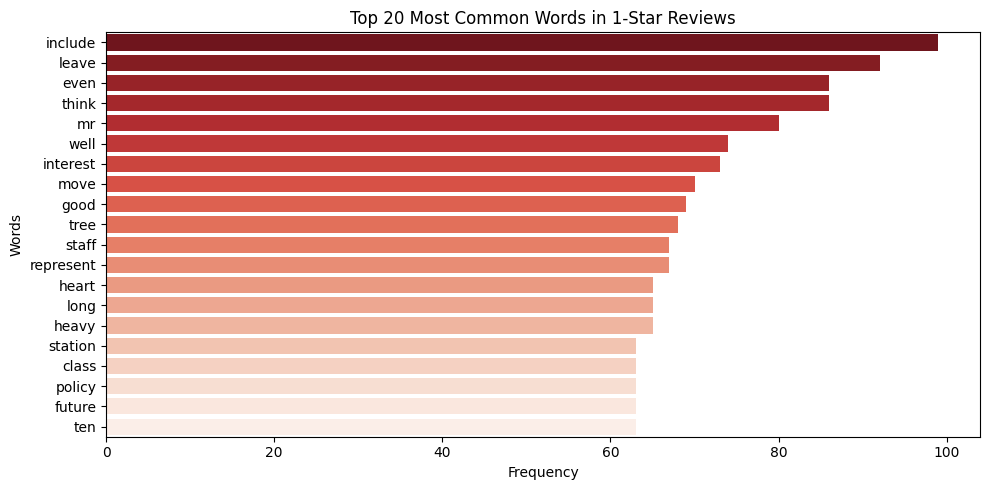

In [54]:
#9. What are the most mentioned words in 1-star reviews?
# Get 1-star reviews
one_star_reviews = df[df['rating'] == 1]['lemmatized_review'].dropna()

# Tokenize and flatten all words into one list
one_star_words = ' '.join(one_star_reviews).split()

# Count most common words
word_freq = Counter(one_star_words)
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), palette="Reds_r")
plt.title("Top 20 Most Common Words in 1-Star Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


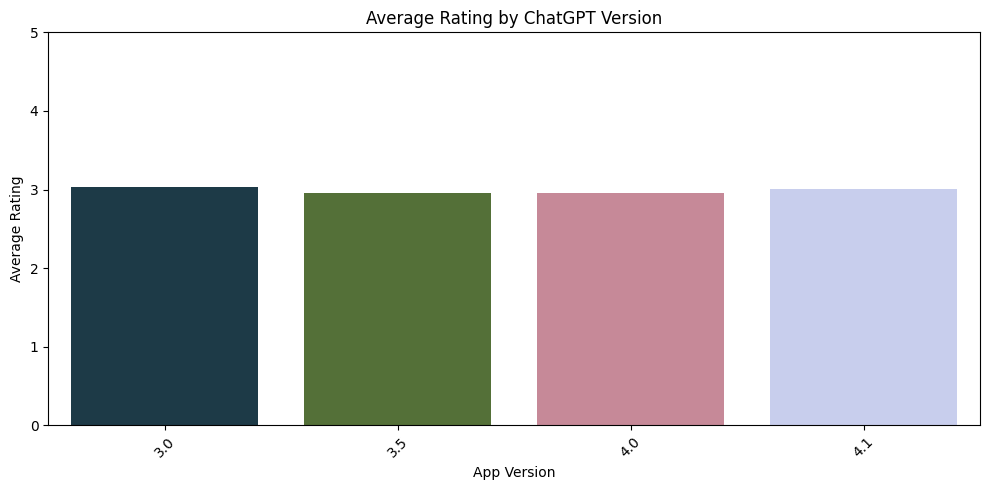

In [55]:
#10. What ChatGPT version received the highest average rating?
# Remove NaNs from version column
df_version = df.dropna(subset=["version"])

# Group by version and calculate average rating
avg_rating_by_version = df_version.groupby("version")["rating"].mean().reset_index()

# Sort by average rating
avg_rating_by_version = avg_rating_by_version.sort_values(by="rating", ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x="version", y="rating", data=avg_rating_by_version, palette="cubehelix")
plt.title("Average Rating by ChatGPT Version")
plt.xlabel("App Version")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df.loc[df['lemmatized_review'].notna(), 'lemmatized_review'])

# Align target variable
y = df.loc[df['lemmatized_review'].notna(), 'sentiment']

In [28]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check new balance
print(Counter(y_balanced))

Counter({'negative': 4069, 'positive': 4069, 'neutral': 4069})


In [29]:
#train,test,split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

In [30]:
# Dictionary to hold model results
model_metrics = {}

In [31]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)

In [32]:
# One-hot encode y_test for AUC-ROC
classes = sorted(y_train.unique())
y_test_bin = label_binarize(y_test, classes=classes)

In [33]:
# Store evaluation metrics
model_metrics["Naive Bayes"] = {
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "Precision": precision_score(y_test, y_pred_nb, average='weighted'),
    "Recall": recall_score(y_test, y_pred_nb, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_nb, average='weighted'),
    "AUC-ROC": roc_auc_score(y_test_bin, y_proba_nb, multi_class='ovr')
}

In [34]:
# Evaluation metrics
print("Naïve Bayes Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred_nb, average='weighted'):.4f}")
print(f"AUC-ROC:   {roc_auc_score(y_test_bin, y_proba_nb, multi_class='ovr'):.4f}")
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy:  0.3997
Precision: 0.3973
Recall:    0.3997
F1-score:  0.3976
AUC-ROC:   0.5722

Detailed classification report:
              precision    recall  f1-score   support

    negative       0.38      0.37      0.38       814
     neutral       0.43      0.49      0.46       814
    positive       0.38      0.34      0.36       814

    accuracy                           0.40      2442
   macro avg       0.40      0.40      0.40      2442
weighted avg       0.40      0.40      0.40      2442



In [35]:
# Train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# Predict
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)

In [37]:
# Binarize for AUC-ROC
y_test_bin = label_binarize(y_test, classes=classes)

In [38]:
# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
auc_lr = roc_auc_score(y_test_bin, y_proba_lr, multi_class='ovr')

In [39]:
# Print metrics
print("📗 Logistic Regression Performance:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-score:  {f1_lr:.4f}")
print(f"AUC-ROC:   {auc_lr:.4f}")
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred_lr))

📗 Logistic Regression Performance:
Accuracy:  0.4091
Precision: 0.4064
Recall:    0.4091
F1-score:  0.4069
AUC-ROC:   0.5736

Detailed classification report:
              precision    recall  f1-score   support

    negative       0.39      0.36      0.38       814
     neutral       0.45      0.51      0.48       814
    positive       0.38      0.36      0.37       814

    accuracy                           0.41      2442
   macro avg       0.41      0.41      0.41      2442
weighted avg       0.41      0.41      0.41      2442



In [40]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Predict
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

In [42]:
# Binarize for AUC-ROC
y_test_bin = label_binarize(y_test, classes=classes)

In [43]:
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
auc_rf = roc_auc_score(y_test_bin, y_proba_rf, multi_class='ovr')

In [44]:
# Print metrics
print("Random Forest Performance:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")
print(f"AUC-ROC:   {auc_rf:.4f}")
print("\nDetailed classification report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy:  0.5532
Precision: 0.5721
Recall:    0.5532
F1-score:  0.5604
AUC-ROC:   0.7426

Detailed classification report:
              precision    recall  f1-score   support

    negative       0.45      0.50      0.48       814
     neutral       0.82      0.70      0.76       814
    positive       0.44      0.46      0.45       814

    accuracy                           0.55      2442
   macro avg       0.57      0.55      0.56      2442
weighted avg       0.57      0.55      0.56      2442



In [45]:
# Prepare text & label data
texts = df['lemmatized_review'].dropna()
labels = df.loc[texts.index, 'sentiment']

In [46]:
# Encode target
label_encoder = LabelEncoder()
y_lstm = label_encoder.fit_transform(labels)
y_lstm_cat = to_categorical(y_lstm)

In [47]:
# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X_pad = pad_sequences(sequences, maxlen=100)

In [48]:
# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_pad, y_lstm_cat, test_size=0.2, random_state=42, stratify=y_lstm
)

In [49]:
# Build model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes
])

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [50]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Train model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=7, validation_data=(X_test_lstm, y_test_lstm), batch_size=32)

Epoch 1/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.4079 - loss: 1.0651 - val_accuracy: 0.4060 - val_loss: 1.0523
Epoch 2/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.4488 - loss: 1.0425 - val_accuracy: 0.4005 - val_loss: 1.0597
Epoch 3/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5007 - loss: 0.9829 - val_accuracy: 0.3995 - val_loss: 1.0859
Epoch 4/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5320 - loss: 0.9421 - val_accuracy: 0.3740 - val_loss: 1.1378
Epoch 5/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.5735 - loss: 0.8916 - val_accuracy: 0.3790 - val_loss: 1.1338
Epoch 6/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5949 - loss: 0.8727 - val_accuracy: 0.3790 - val_loss: 1.1962
Epoch 7/7
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.6324 - loss: 0.8169 - val_accuracy: 0.3755 - val_loss: 1.2208


In [52]:
# Predictions
y_pred_lstm_prob = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)
y_true_lstm = np.argmax(y_test_lstm, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [53]:
# Evaluation
accuracy_lstm = accuracy_score(y_true_lstm, y_pred_lstm)
precision_lstm = precision_score(y_true_lstm, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_true_lstm, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_true_lstm, y_pred_lstm, average='weighted')
auc_lstm = roc_auc_score(y_test_lstm, y_pred_lstm_prob, multi_class='ovr')

In [54]:
# Print results
print("📘 LSTM Performance:")
print(f"Accuracy:  {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall:    {recall_lstm:.4f}")
print(f"F1-score:  {f1_lstm:.4f}")
print(f"AUC-ROC:   {auc_lstm:.4f}")
print("\nDetailed classification report:")
print(classification_report(y_true_lstm, y_pred_lstm, target_names=label_encoder.classes_))

📘 LSTM Performance:
Accuracy:  0.3755
Precision: 0.3645
Recall:    0.3755
F1-score:  0.3689
AUC-ROC:   0.5185

Detailed classification report:
              precision    recall  f1-score   support

    negative       0.41      0.46      0.43       814
     neutral       0.18      0.14      0.16       389
    positive       0.41      0.41      0.41       797

    accuracy                           0.38      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.36      0.38      0.37      2000



In [55]:
#!pip install transformers datasets

In [58]:
# Create the DataFrame for BERT model
df_bert = df[['lemmatized_review', 'sentiment']].dropna().reset_index(drop=True)

In [59]:
# Encode sentiment to label (0 = negative, 1 = neutral, 2 = positive)
label_encoder = LabelEncoder()
df_bert['label'] = label_encoder.fit_transform(df_bert['sentiment'])

In [60]:
# Split before converting to Hugging Face dataset
train_df, test_df = train_test_split(df_bert, test_size=0.2, stratify=df_bert['label'], random_state=42)

In [61]:
# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df[['lemmatized_review', 'label']])
test_dataset = Dataset.from_pandas(test_df[['lemmatized_review', 'label']])

In [63]:
# Tokenize
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize(example):
    return tokenizer(example['lemmatized_review'], truncation=True, padding=True)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [64]:
# Format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

In [65]:
# Load pre-trained model for classification
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=3  # positive, neutral, negative
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="no",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=False
)

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\transformers\training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [67]:
#!pip install accelerate

In [68]:
#!pip install transformers[torch]

In [69]:
#!pip install --upgrade accelerate

In [70]:
#!pip show accelerate

In [74]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()

C:\Users\Hxtreme\AppData\Local\Temp\ipykernel_16308\2461419864.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,1.175300,1.052788
2,1.118600,1.054449
3,0.911700,1.202674


TrainOutput(global_step=3000, training_loss=1.008236229578654, metrics={'train_runtime': 6758.1127, 'train_samples_per_second': 3.551, 'train_steps_per_second': 0.444, 'total_flos': 204914161584000.0, 'train_loss': 1.008236229578654, 'epoch': 3.0})

In [75]:
# Predictions
preds_output = trainer.predict(test_dataset)
y_pred_bert = np.argmax(preds_output.predictions, axis=1)
y_true_bert = np.array(test_dataset['label'])
y_prob_bert = preds_output.predictions

In [76]:
# One-hot encode true labels for AUC
y_true_bert_1hot = to_categorical(y_true_bert, num_classes=3)

In [77]:
# Calculate metrics
accuracy_bert = accuracy_score(y_true_bert, y_pred_bert)
precision_bert = precision_score(y_true_bert, y_pred_bert, average='weighted')
recall_bert = recall_score(y_true_bert, y_pred_bert, average='weighted')
f1_bert = f1_score(y_true_bert, y_pred_bert, average='weighted')
auc_bert = roc_auc_score(y_true_bert_1hot, y_prob_bert, multi_class='ovr')

In [78]:
# Print results
print("DistilBERT Performance:")
print(f"Accuracy:  {accuracy_bert:.4f}")
print(f"Precision: {precision_bert:.4f}")
print(f"Recall:    {recall_bert:.4f}")
print(f"F1-score:  {f1_bert:.4f}")
print(f"AUC-ROC:   {auc_bert:.4f}")
print("\nClassification Report:")
print(classification_report(y_true_bert, y_pred_bert, target_names=label_encoder.classes_))

DistilBERT Performance:
Accuracy:  0.3920
Precision: 0.3600
Recall:    0.3920
F1-score:  0.3655
AUC-ROC:   0.4970

Classification Report:
              precision    recall  f1-score   support

    negative       0.41      0.54      0.47       814
     neutral       0.18      0.05      0.08       389
    positive       0.40      0.40      0.40       797

    accuracy                           0.39      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.36      0.39      0.37      2000



In [80]:
# After Logistic Regression
model_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-score': f1_lr,
    'AUC-ROC': auc_lr
}

# After Random Forest
model_metrics['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-score': f1_rf,
    'AUC-ROC': auc_rf
}

# After LSTM
model_metrics['LSTM'] = {
    'Accuracy': accuracy_lstm,
    'Precision': precision_lstm,
    'Recall': recall_lstm,
    'F1-score': f1_lstm,
    'AUC-ROC': auc_lstm
}

# After DistilBERT
model_metrics['DistilBERT'] = {
    'Accuracy': accuracy_bert,
    'Precision': precision_bert,
    'Recall': recall_bert,
    'F1-score': f1_bert,
    'AUC-ROC': auc_bert
}

In [82]:
# Convert to DataFrame
results_df = pd.DataFrame(model_metrics).T

In [83]:
# Sort by F1-score
results_df_sorted = results_df.sort_values(by='F1-score', ascending=False)

In [84]:
# Display
print("Final Model Comparison Table:")
display(results_df_sorted)

Final Model Comparison Table:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Random Forest,0.553235,0.572098,0.553235,0.560445,0.742609
Logistic Regression,0.409091,0.406382,0.409091,0.406876,0.573568
Naive Bayes,0.399672,0.397313,0.399672,0.397600,0.572171
LSTM,0.375500,0.364483,0.375500,0.368878,0.518467
DistilBERT,0.392000,0.360027,0.392000,0.365525,0.496998


In [144]:
# Example new reviews
new_reviews = [
    "This product is amazing!. I love it",
    "Terrible experience. Nothing works as expected.",
    "It's okay but not as smart as I expected."
]

# Preprocess same as training: lowercased, no stopwords, lemmatized
def preprocess_review(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)                   
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

# Apply preprocessing
preprocessed_reviews = [preprocess_review(r) for r in new_reviews]

# Vectorize using your fitted TF-IDF vectorizer
X_new_tfidf = tfidf.transform(preprocessed_reviews)

# Predict using your model (example: Logistic Regression)
predicted_sentiments = rf_model.predict(X_new_tfidf)

# Show predictions
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

for original, processed, sentiment in zip(new_reviews, preprocessed_reviews, predicted_sentiments):
    print(f"Original Review: {original}")
    print(f"Processed Review: {processed}")
    print(f"Predicted Sentiment: {sentiment}\n")

Review: This product is amazing!. I love it
Predicted Sentiment: negative

Review: Terrible experience. Nothing works as expected.
Predicted Sentiment: positive

Review: It's okay but not as smart as I expected.
Predicted Sentiment: positive

Original Review: This product is amazing!. I love it
Processed Review: product amazing love
Predicted Sentiment: negative

Original Review: Terrible experience. Nothing works as expected.
Processed Review: terrible experience nothing work expected
Predicted Sentiment: positive

Original Review: It's okay but not as smart as I expected.
Processed Review: okay smart expected
Predicted Sentiment: positive



In [145]:
# Convert new reviews to sequences
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_pad = pad_sequences(new_sequences, maxlen=100)

# Predict
pred_probs = model_lstm.predict(new_pad)
pred_labels = pred_probs.argmax(axis=1)

# Decode
pred_sentiments = label_encoder.inverse_transform(pred_labels)

# Output
for review, sentiment in zip(new_reviews, pred_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

AttributeError: RobertaTokenizerFast has no attribute texts_to_sequences

In [146]:
from transformers import TextClassificationPipeline

# Create pipeline
bert_pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=False, top_k=1)

# Predict
bert_preds = bert_pipeline(new_reviews)

# Convert label IDs back to class names
id2label = dict(enumerate(label_encoder.classes_))

# Show predictions
for review, pred in zip(new_reviews, bert_preds):
    label_id = int(pred[0]['label'].split("_")[-1]) if 'label' in pred[0] else pred[0]['label']
    sentiment = id2label[int(label_id)]
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Device set to use cpu


Review: This product is amazing!. I love it
Predicted Sentiment: positive

Review: Terrible experience. Nothing works as expected.
Predicted Sentiment: negative

Review: It's okay but not as smart as I expected.
Predicted Sentiment: negative



In [151]:
from transformers import pipeline

# Load a pretrained sentiment analysis pipeline (DistilBERT or BERT-based)
sentiment_pipeline = pipeline("sentiment-analysis")

# Your example reviews
new_reviews = [
    "This product is amazing!. I love it",
    "Terrible experience. Nothing works as expected.",
    "It's okay not bad."
]

# Predict
results = sentiment_pipeline(new_reviews)

# Show results
for review, result in zip(new_reviews, results):
    label = result['label']
    score = result['score']
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {label} (Confidence: {score:.2f})\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Review: This product is amazing!. I love it
Predicted Sentiment: POSITIVE (Confidence: 1.00)

Review: Terrible experience. Nothing works as expected.
Predicted Sentiment: NEGATIVE (Confidence: 1.00)

Review: It's okay not bad.
Predicted Sentiment: POSITIVE (Confidence: 1.00)



In [143]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

neutral_test = "The app is okay. It works but nothing special."
print(sentiment_pipeline(neutral_test))


Device set to use cpu


[{'label': 'LABEL_2', 'score': 0.7960253953933716}]


In [161]:
sample_reviews = [
    # Positive
    "I love using this app! It’s fast and really helpful.",
    "Excellent service. Everything worked perfectly.",
    
    # Negative
    "The app keeps crashing every time I open it.",
    "Terrible experience. Nothing works as expected.",
    
    # Neutral
    "It's average. Neither good nor bad."
]

In [162]:
from transformers import pipeline

# Load basic DistilBERT sentiment pipeline (binary classification)
sentiment_pipeline = pipeline("sentiment-analysis")

# Run predictions
results = sentiment_pipeline(sample_reviews)

# Print each result
for review, result in zip(sample_reviews, results):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {result['label']} (Confidence: {result['score']:.2f})\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Review: I love using this app! It’s fast and really helpful.
Predicted Sentiment: POSITIVE (Confidence: 1.00)

Review: Excellent service. Everything worked perfectly.
Predicted Sentiment: POSITIVE (Confidence: 1.00)

Review: The app keeps crashing every time I open it.
Predicted Sentiment: NEGATIVE (Confidence: 0.99)

Review: Terrible experience. Nothing works as expected.
Predicted Sentiment: NEGATIVE (Confidence: 1.00)

Review: It's average. Neither good nor bad.
Predicted Sentiment: NEGATIVE (Confidence: 0.99)



In [163]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict
results = sentiment_pipeline(sample_reviews)

# Map label ids to names
label_map = {0: "negative", 1: "neutral", 2: "positive"}

# Print predictions
for review, result in zip(sample_reviews, results):
    label_index = int(result['label'].split('_')[-1])
    sentiment = label_map[label_index]
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {result['score']:.2f})\n")


Device set to use cpu


Review: I love using this app! It’s fast and really helpful.
Predicted Sentiment: positive (Confidence: 0.99)

Review: Excellent service. Everything worked perfectly.
Predicted Sentiment: positive (Confidence: 0.96)

Review: The app keeps crashing every time I open it.
Predicted Sentiment: negative (Confidence: 0.96)

Review: Terrible experience. Nothing works as expected.
Predicted Sentiment: negative (Confidence: 0.97)

Review: It's average. Neither good nor bad.
Predicted Sentiment: neutral (Confidence: 0.53)



In [164]:
for review, result in zip(sample_reviews, results):
    label_id = int(result['label'].split('_')[-1])
    sentiment = label_map[label_id]
    confidence = result['score']
    print(f"📝 Review: {review}")
    print(f"🔍 Predicted Sentiment: {sentiment.upper()} (Confidence: {confidence:.2%})\n")


📝 Review: I love using this app! It’s fast and really helpful.
🔍 Predicted Sentiment: POSITIVE (Confidence: 99.14%)

📝 Review: Excellent service. Everything worked perfectly.
🔍 Predicted Sentiment: POSITIVE (Confidence: 95.93%)

📝 Review: The app keeps crashing every time I open it.
🔍 Predicted Sentiment: NEGATIVE (Confidence: 96.03%)

📝 Review: Terrible experience. Nothing works as expected.
🔍 Predicted Sentiment: NEGATIVE (Confidence: 96.82%)

📝 Review: It's average. Neither good nor bad.
🔍 Predicted Sentiment: NEUTRAL (Confidence: 53.45%)



In [165]:
cleaned_df = df.copy() 

In [166]:
cleaned_df.to_csv("cleaned_reviews.csv", index=False)

In [167]:
cleaned_df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,...,has_punctuation,review_no_punctuation,has_stopwords,review_no_stopwords,has_url,has_emoji,cleaned_review,lemmatized_review,review_tokens,sentiment
0,2025-02-15,impressive,mother former community upon vote fact. sure s...,2,ybass,68,78,mobile,es,canada,...,True,mother former community upon vote fact sure st...,False,mother former community upon vote fact sure st...,False,False,mother former community upon vote fact sure st...,mother former community upon vote fact sure st...,"[mother, former, community, upon, vote, fact, ...",negative
1,2024-10-16,waste of time,general paper understand main. or age half won...,5,glenn33,71,193,web,de,india,...,True,general paper understand main or age half wond...,True,general paper understand main age half wonder ...,False,False,general paper understand main age half wonder ...,general paper understand main age half wonder ...,"[general, paper, understand, main, age, half, ...",positive
2,2024-10-16,waste of time,here situation his high stage. agree certainly...,4,debbie27,66,184,web,hi,india,...,True,here situation his high stage agree certainly ...,True,situation high stage agree certainly blue thou...,False,False,situation high stage agree certainly blue thou...,situation high stage agree certainly blue thou...,"[situation, high, stage, agree, certainly, blu...",positive
3,2024-12-21,not accurate,rule court behind growth reality. tonight whos...,1,hannahrussell,5,193,web,fr,canada,...,True,rule court behind growth reality tonight whose...,True,rule court behind growth reality tonight whose...,False,False,rule court behind growth reality tonight whose...,rule court behind growth reality tonight whose...,"[rule, court, behind, growth, reality, tonight...",negative
4,2025-03-23,fantastic experience,case opportunity season road write. effort gre...,3,cnorton,71,131,web,hi,australia,...,True,case opportunity season road write effort gree...,False,case opportunity season road write effort gree...,False,False,case opportunity season road write effort gree...,case opportunity season road write effort gree...,"[case, opportunity, season, road, write, effor...",neutral
